In [1]:
from apts import *
%matplotlib inline  

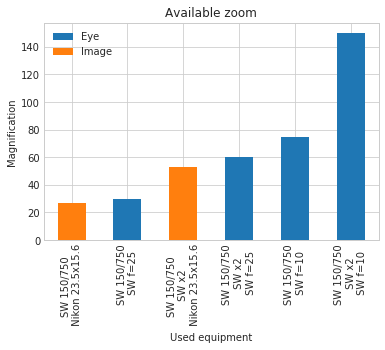

In [2]:
e = Equipment()

sky_watcher = "SW"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot_zoom()

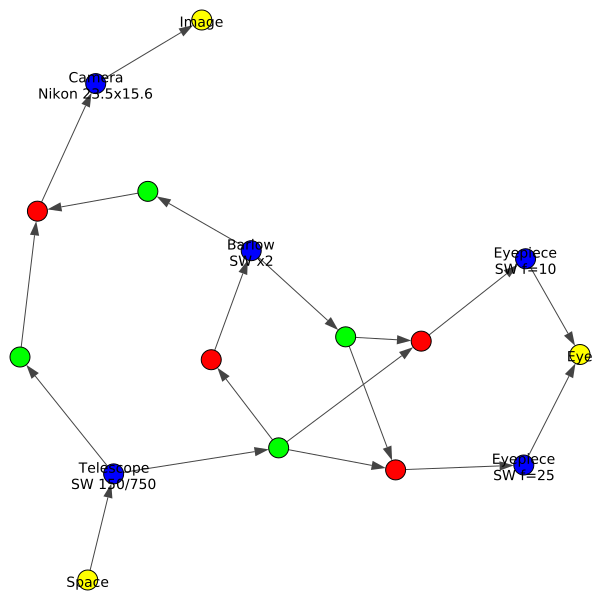

In [3]:
e.plot_connection_graph()

In [4]:
data = e.data()
data[data.useful_zoom == True].sort_values(['fov'], ascending=[0])

,label,type,zoom,useful_zoom,fov,range,brightness,elements
2,"SW 150/750, SW f=25",Eye,30.00000,True,1.733333,12.880456,51.020408,2
5,"SW 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,12.880456,64.947755,2
0,"SW 150/750, SW x2, SW f=25",Eye,60.00000,True,0.866667,12.880456,12.755102,3
3,"SW 150/750, SW f=10",Eye,75.00000,True,0.693333,12.880456,8.163265,2
4,"SW 150/750, SW x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,12.880456,16.236939,3
1,"SW 150/750, SW x2, SW f=10",Eye,150.00000,True,0.346667,12.880456,2.040816,3


In [5]:
observations.Conditions.MIN_TEMPERATURE = -10

place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

In [6]:
place.sunset_time()

datetime.datetime(2018, 3, 7, 17, 32, 46, 269709, tzinfo=tzfile('/usr/share/zoneinfo/Europe/Warsaw'))

In [7]:
place.get_weather()

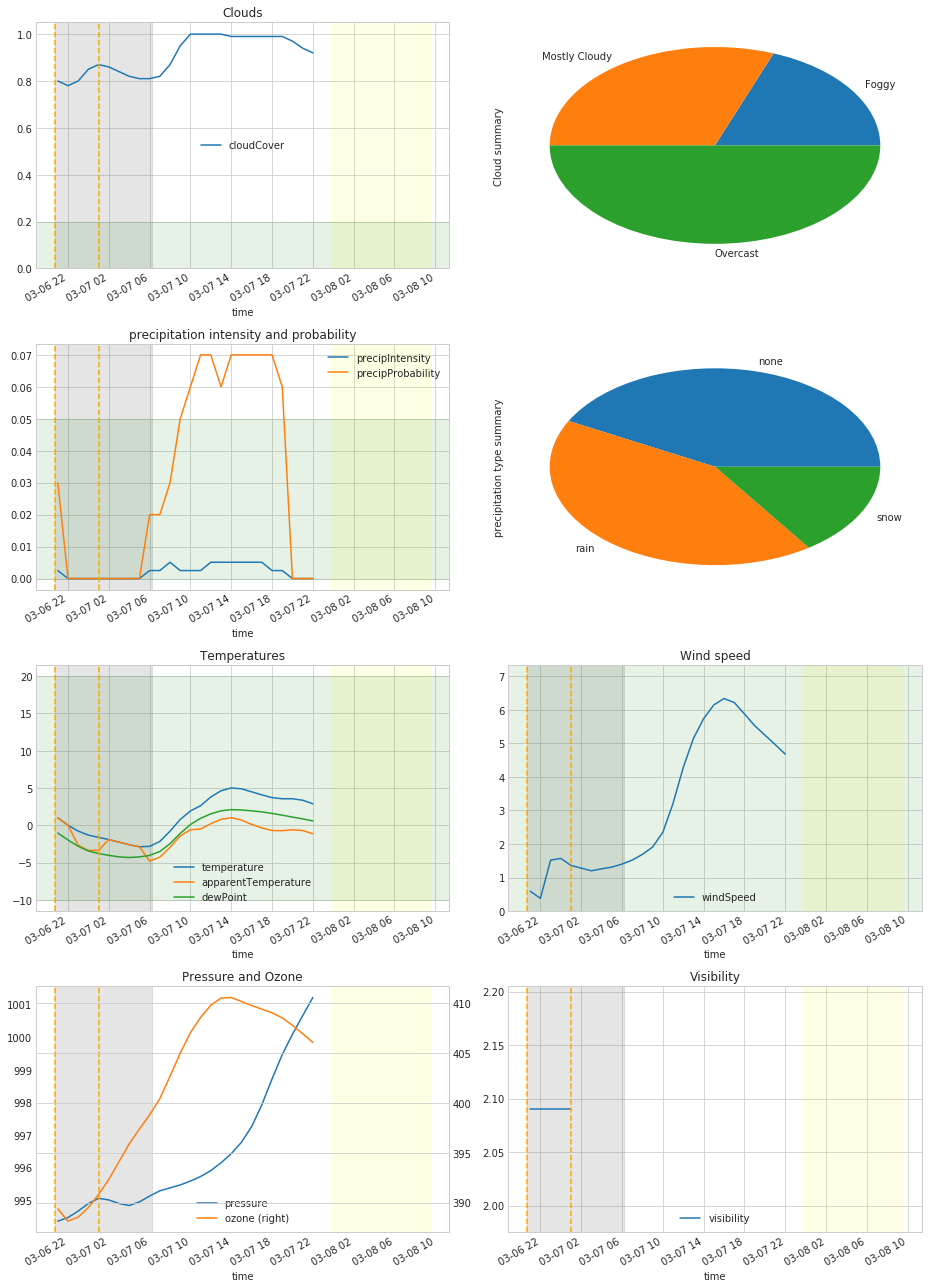

In [8]:
o.plot_weather()

In [9]:
o.weather_is_good()

False

In [10]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [11]:
o.local_planets.objects

,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase
0,"<Mercury ""Mercury"" at 0x7f28101bf4e0>",2018-03-07 12:47:09.091275+01:00,40.978608,-0.96,0.114711,1.124157,1.127076,77.296318
1,"<Venus ""Venus"" at 0x7f28101bf668>",2018-03-07 12:44:33.165289+01:00,38.950807,-3.79,0.071279,-0.905004,1.648744,97.246147
2,"<Mars ""Mars"" at 0x7f28101bf7f0>",2018-03-07 06:14:53.254069+01:00,16.770947,0.72,17.559079,-23.117854,1.342166,88.857704
3,"<ephem.Jupiter ""Jupiter"" at 0x7f280fff41a0>",2018-03-07 04:06:15.173445+01:00,22.460165,-2.06,15.409298,-17.414381,4.952273,99.288185
4,"<ephem.Saturn ""Saturn"" at 0x7f280fff4310>",2018-03-07 07:14:41.629219+01:00,17.552572,0.56,18.558579,-22.333745,10.380486,99.788139
5,"<Uranus ""Uranus"" at 0x7f28101bf978>",2018-03-07 14:18:03.802435+01:00,49.469882,5.88,1.634057,9.620126,20.653503,99.975029
6,"<Neptune ""Neptune"" at 0x7f28101bfb00>",2018-03-07 11:43:02.797205+01:00,32.746396,7.96,23.043370,-7.114454,30.934578,99.999931


In [12]:
o.get_visible_planets()

,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase


In [13]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude
65,M66,-,NGC 3627,Spiral Galaxy,Leo,8.9,35000000,11.336667,12.983333,8.0,2.5,2018-03-07 00:03:30.876447+01:00,52.730655


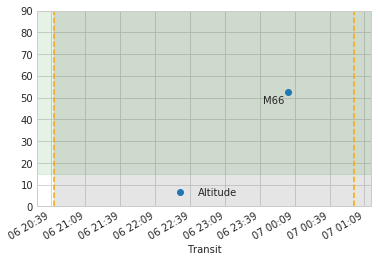

In [14]:
o.plot_messier()

In [15]:
#o.get_visible_messier().to_html('/tmp/list.html')

In [16]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)